# UDS emulator 

## Preliminaries

In [1]:
from my_imports import *

In [2]:
yaml_path = 'config_file.yaml'
yaml_data = utils.load_yaml(yaml_path)

# Directories
training_simulations_path   = yaml_data['training_simulations_path']
validation_simulations_path = yaml_data['validation_simulations_path']

inp_path =  yaml_data['inp_path']

## Create simulation objects from data

In [3]:
list_of_training_simulations    = os.listdir(training_simulations_path)
list_of_validation_simulations  = os.listdir(validation_simulations_path)

print('Number of training simulations: ', len(list_of_training_simulations))
print('Number of validation simulations: ', len(list_of_validation_simulations))


Number of training simulations:  163
Number of validation simulations:  29


In [4]:
num_events = 10

validation_simulations = utils.extract_simulations_from_folders(validation_simulations_path, inp_path, max_events =num_events)

validation_windows = []
events_to_validate= list(range(num_events))
for event in events_to_validate:
    sim = validation_simulations[event]
    validation_windows += sim.get_all_windows(steps_ahead = 10)

The file does not have [STORAGE]

The file does not have '[PUMPS]\n'
The file does not have '[ORIFICES]\n'
The file does not have '[WEIRS]\n'


In [5]:
num_events = 10
training_simulations = utils.extract_simulations_from_folders(training_simulations_path, inp_path, max_events = num_events)

training_windows = []
events_to_train= list(range(num_events))
for event in events_to_train:
    sim = training_simulations[event]
    training_windows += sim.get_all_windows(steps_ahead = 10)

The file does not have [STORAGE]

The file does not have '[PUMPS]\n'
The file does not have '[ORIFICES]\n'
The file does not have '[WEIRS]\n'


## Normalizer

In [6]:
normalizer = Normalizer(training_windows)

In [7]:
normalized_training_windows = normalizer.get_list_normalized_training_windows()
training_loader = DataLoader(normalized_training_windows, batch_size=32, shuffle = True)

In [8]:
normalized_validation_windows = [normalizer.normalize_window(val_win) for val_win in validation_windows]
validation_loader = DataLoader(normalized_validation_windows, batch_size=32)

## Training GNN

In [9]:
gnn_model = GNNModel()
optimizer = optim.Adam(gnn_model.parameters(), lr = 0.01)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
loss_fn = nn.MSELoss()

In [10]:
history = train(
    model = gnn_model,
    optimizer = optimizer,
    scheduler = scheduler,
    loss_fn = loss_fn,
    train_dl = training_loader,
    val_dl = validation_loader,
    epochs = 50,
    device = 'cpu',
    report_freq = 10
    )


train() called:model=GNNModel, opt=Adam(lr=0.010000), epochs=50,device=cpu

Epoch   1/ 50, train loss:  1.78, val loss:  1.27
Epoch  10/ 50, train loss:  0.68, val loss:  1.30
Epoch  20/ 50, train loss:  0.68, val loss:  1.29
Early stopping! The Current Loss: 1.2930922231974942

Time total:     221.76 sec
Time per epoch:  4.44 sec


## Results

In [16]:
vis.plot_loss(history)

## Using the metamodel

In [24]:
importlib.reload(utils)

<module 'utils.head_change_utils' from 'c:\\Users\\agarzondiaz\\surfdrive\\Year 2\\Paper 2 - 3.0\\utils\\head_change_utils.py'>

In [25]:
val_event =  validation_simulations[0]

length = val_event.simulation_length
sim_in_window = val_event.get_all_windows(length-2)[0]
norm_sim_in_window = normalizer.normalize_window(sim_in_window)

name_nodes = norm_sim_in_window.name_nodes

swmm_heads_pd       = utils.tensor_heads_to_normalized_pd(sim_in_window['y'],             normalizer, name_nodes)
predicted_heads_pd  = utils.tensor_heads_to_normalized_pd(gnn_model(norm_sim_in_window),  normalizer, name_nodes)

<AxesSubplot:>

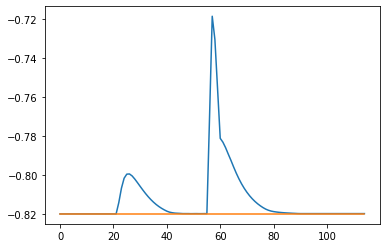

In [26]:
node = name_nodes[24]

swmm_heads_pd[node].plot()
predicted_heads_pd[node].plot()

# Scratchpad

In [59]:
importlib.reload(vis)

<module 'visualizations.Visualization' from 'c:\\Users\\agarzondiaz\\surfdrive\\Year 2\\Paper 2 - 3.0\\visualizations\\Visualization.py'>

In [62]:

#OrRd: Orange to red

columns = ['Node', 'x_coord' , 'y_coord']


head = norm_sim_in_window.y[:,68]



value = utils.head_to_depth(head, normalizer, norm_sim_in_window)

fig = go.Figure()
fig.add_trace(vis.plot_nodal_variable(value, norm_sim_in_window, colorscale = 'OrRd'))

fig.update_layout(width=500, height=800)

fig.show()


In [48]:
value

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [45]:
ht = norm_sim_in_window.y[:,67]

In [36]:
norm_sim_in_window.norm_elev.shape

torch.Size([318, 1])